In [30]:
import os
os.environ["OMP_NUM_THREADS"] = "1" 
os.environ["MKL_NUM_THREADS"] = "1" 

from sklearn.cluster import KMeans, AgglomerativeClustering
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA

In [31]:
# Laddar upp csv-fil och deklarerar den som Wholesale_customers_data
Wholesale_customers_data = pd.read_csv('Wholesale customers data.csv')

In [32]:
# Vi beskriver datan med .describe för att få en överblick över all data
Wholesale_customers_data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


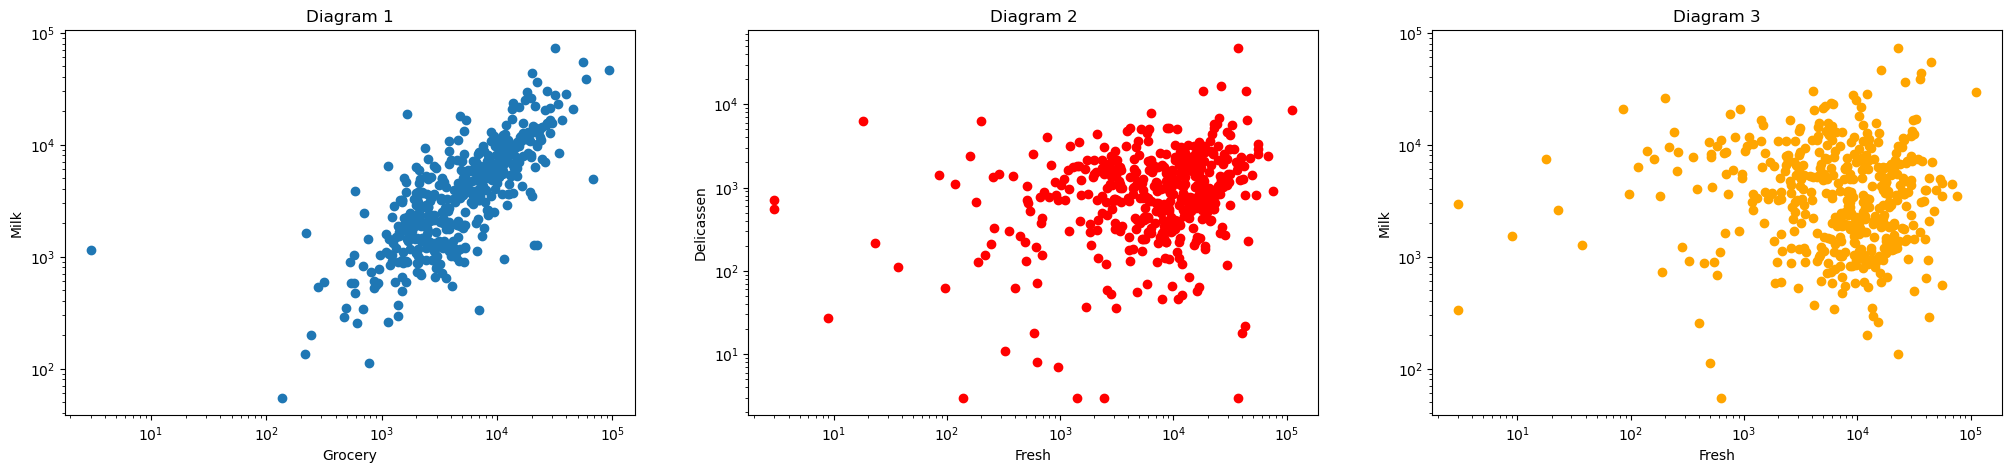

In [33]:
# Använder en scatterplot för att jämföra data, vi använder också en logaritmisk skala för att inte värderna ska bli så centerade till vänstra hörnet. 
fig, axes = plt.subplots(1, 3, figsize=(25, 5))


# Första diagrammet (index 0)
axes[0].scatter(Wholesale_customers_data.iloc[:,4].values, Wholesale_customers_data.iloc[:,3].values)
axes[0].set_title("Diagram 1")
axes[0].set_xlabel("Grocery")
axes[0].set_ylabel("Milk")
axes[0].set_xscale('log')
axes[0].set_yscale('log')

# Andra diagrammet (index 1)
axes[1].scatter(Wholesale_customers_data.iloc[:,2].values, Wholesale_customers_data.iloc[:,7].values, c='red')
axes[1].set_title("Diagram 2")
axes[1].set_xlabel("Fresh")
axes[1].set_ylabel("Delicassen")
axes[1].set_xscale('log')
axes[1].set_yscale('log')

# Tredje diagrammet (index 2)
axes[2].scatter(Wholesale_customers_data.iloc[:,2].values, Wholesale_customers_data.iloc[:,3].values, c='orange')
axes[2].set_title("Diagram 3")
axes[2].set_xlabel("Fresh")
axes[2].set_ylabel("Milk")
axes[2].set_xscale('log')
axes[2].set_yscale('log')

plt.show()

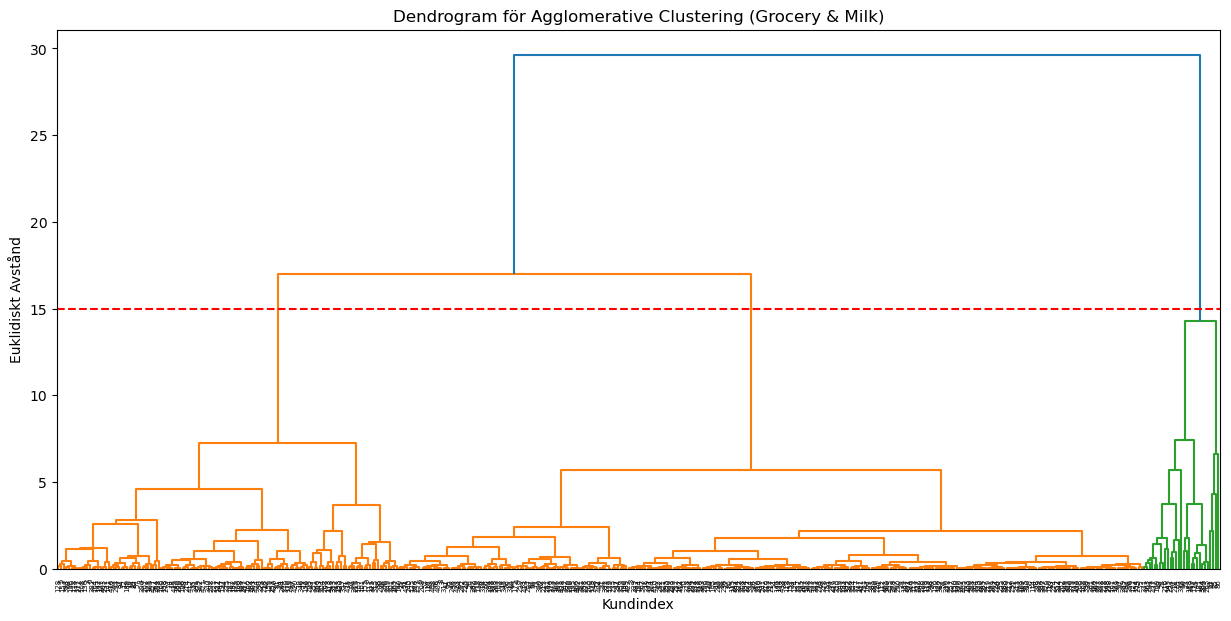

In [34]:
# Skapar ett Dendrogram för att kunna avgöra hur många kluster vi ska använda.
features = ['Grocery', 'Milk']
X_selected = Wholesale_customers_data[features].values

# Skala datan (Nödvändigt för avståndsbaserad klustring)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Använd Dendrogram för att hitta optimalt k
# Beräkna Linkage Matrix (med 'ward'-metoden)
linked = linkage(X_scaled, method='ward')

# Generera dendrogrammet
plt.figure(figsize=(15, 7))
dendrogram(
    linked,
    orientation='top',
    distance_sort='descending',
    show_leaf_counts=False
)
plt.title('Dendrogram för Agglomerative Clustering (Grocery & Milk)')
plt.xlabel('Kundindex')
plt.ylabel('Euklidiskt Avstånd')

plt.axhline(y=15, color='r', linestyle='--') 
plt.show()

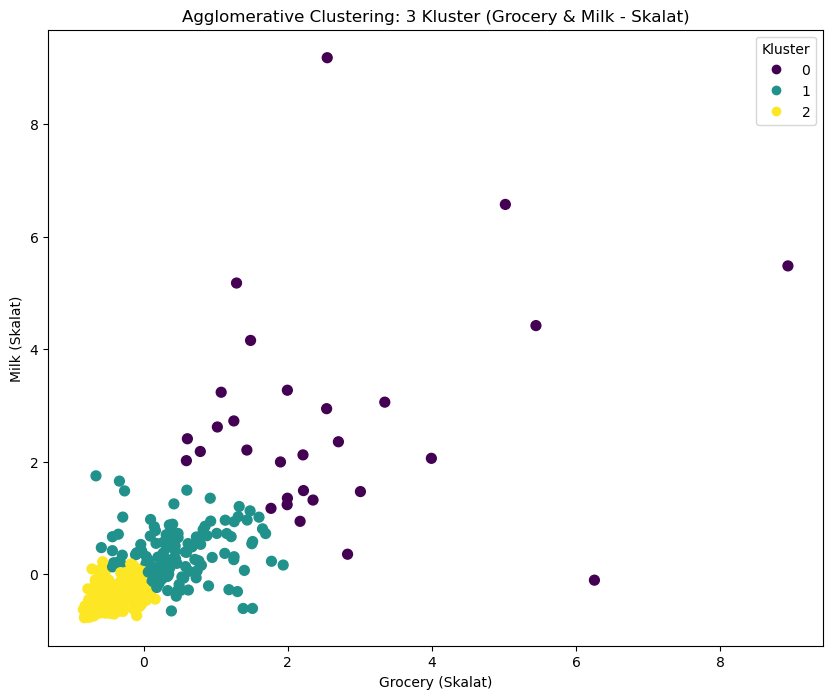

In [35]:
# Sätt optimalt antal kluster baserat på Dendrogrammet
optimal_k = 3

# Kör Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
# Beräkna klusteretiketter och lägg till dem i DataFrame
Wholesale_customers_data['Cluster'] = agglo.fit_predict(X_scaled)

# Visualisera Klustren (på den SCALADE datan)
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], 
                      c=Wholesale_customers_data['Cluster'], 
                      cmap='viridis', 
                      s=50)

plt.title(f'Agglomerative Clustering: {optimal_k} Kluster (Grocery & Milk - Skalat)')
plt.xlabel('Grocery (Skalat)')
plt.ylabel('Milk (Skalat)')
plt.legend(*scatter.legend_elements(), title="Kluster")
plt.show()